##LINEAR REGRESSION

use y = mx + c equation to model your data

### stock price prediction model

dataset: https://www.kaggle.com/dgawlik/nyse

In [1]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
#~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d dgawlik/nyse

 85% 26.0M/30.7M [00:00<00:00, 53.2MB/s]
100% 30.7M/30.7M [00:00<00:00, 77.4MB/s]


In [4]:
!unzip nyse.zip

Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


In [5]:
!ls

fundamentals.csv  prices.csv		     sample_data
nyse.zip	  prices-split-adjusted.csv  securities.csv


prices-split-adjusted.csv

In [6]:
import pandas as pd #imports pandas library(used for csv operations) as the name 'pd'
dataframe = pd.read_csv('prices-split-adjusted.csv', parse_dates=['date']) #reads the csv file into the program
dataframe.head() #outputs first 5 lines of the csv

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Google

In [7]:
dataframe['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
google_df = dataframe[dataframe['symbol']=='GOOGL'].set_index('date')
google_df

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0
2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0
2010-01-06,GOOGL,313.243260,304.434452,303.483494,313.243260,7949400.0
2010-01-07,GOOGL,305.005009,297.347355,296.621617,305.305302,12815700.0
2010-01-08,GOOGL,296.296299,301.311314,294.849857,301.926945,9439100.0
...,...,...,...,...,...,...
2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0


In [9]:
google_df.loc['2016-12-27']

symbol     GOOGL
open      808.68
close     809.93
low        805.8
high         816
volume    974400
Name: 2016-12-27 00:00:00, dtype: object

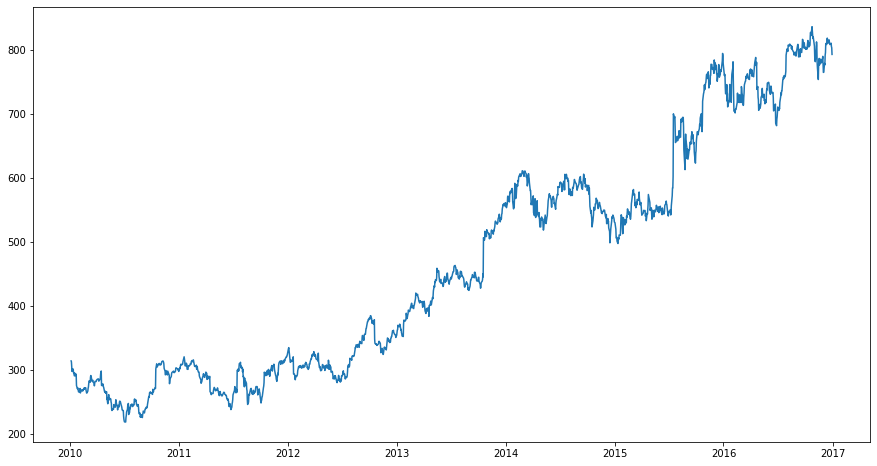

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(google_df.close)

In [12]:
first_day = google_df.index.min()
first_day

Timestamp('2010-01-04 00:00:00')

In [18]:
from datetime import datetime
def calculate_days_since(date, ref_date = first_day): return (date - ref_date).days
calculate_days_since(datetime(2021,9,1))

4258

In [22]:
x = list(map(calculate_days_since, google_df.index)) 
len(x)

1762

In [23]:
y = list(google_df.close)
len(y)

1762

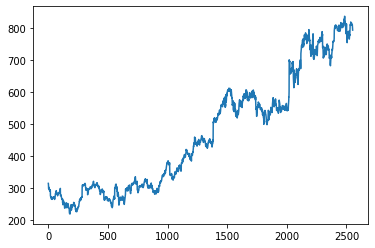

In [24]:
plt.plot(x,y)

Error minimization

In [25]:
from sklearn.linear_model import LinearRegression
modified_x = [[i] for i in x]
modified_x

[[0],
 [1],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [15],
 [16],
 [17],
 [18],
 [21],
 [22],
 [23],
 [24],
 [25],
 [28],
 [29],
 [30],
 [31],
 [32],
 [35],
 [36],
 [37],
 [38],
 [39],
 [43],
 [44],
 [45],
 [46],
 [49],
 [50],
 [51],
 [52],
 [53],
 [56],
 [57],
 [58],
 [59],
 [60],
 [63],
 [64],
 [65],
 [66],
 [67],
 [70],
 [71],
 [72],
 [73],
 [74],
 [77],
 [78],
 [79],
 [80],
 [81],
 [84],
 [85],
 [86],
 [87],
 [91],
 [92],
 [93],
 [94],
 [95],
 [98],
 [99],
 [100],
 [101],
 [102],
 [105],
 [106],
 [107],
 [108],
 [109],
 [112],
 [113],
 [114],
 [115],
 [116],
 [119],
 [120],
 [121],
 [122],
 [123],
 [126],
 [127],
 [128],
 [129],
 [130],
 [133],
 [134],
 [135],
 [136],
 [137],
 [140],
 [141],
 [142],
 [143],
 [144],
 [148],
 [149],
 [150],
 [151],
 [154],
 [155],
 [156],
 [157],
 [158],
 [161],
 [162],
 [163],
 [164],
 [165],
 [168],
 [169],
 [170],
 [171],
 [172],
 [175],
 [176],
 [177],
 [178],
 [179],
 [183],
 [184],
 [185],
 [186],
 [189],
 [190],
 [191],
 [192],
 [193

In [26]:
reg = LinearRegression()
reg.fit(modified_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y = wx+b

In [29]:
w, b = reg.coef_, reg.intercept_
w, b

(array([0.23457238]), 167.7908662706123)

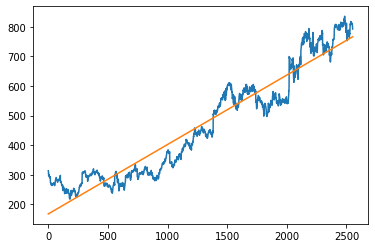

In [30]:
plt.plot(x, y)
plt.plot(x, [w*i + b for i in x])

In [32]:
my_day = datetime(2018,12,31)
days_elapsed = calculate_days_since(my_day)
days_elapsed

3283

In [33]:
w*days_elapsed + b

array([937.89197849])

##Gradient descent algorithm

In [ ]:
z = [-5]
for i in range(1000) : z = z + [z[-1] + 0.01]
z

In [67]:
n = 4

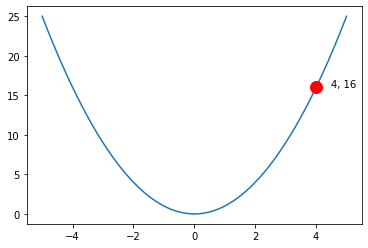

In [68]:
def square(z) : return z**2
fig, ax = plt.subplots()
ax.plot(z, [square(i) for i in z])
point = ax.plot(n, square(n), color='red', marker='o', markersize=12)
text = ax.text(n + 0.5, square(n), f'{n}, {square(n)}')

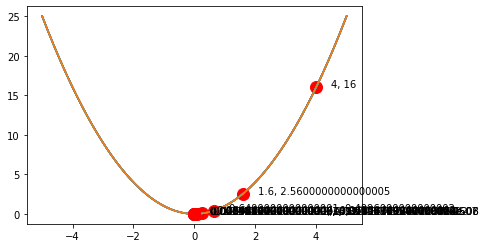

In [79]:
def gradient_of_square(x): return 2*x
n-=0.3*gradient_of_square(n)
ax.plot(z, [square(i) for i in z ])
point = ax.plot(n, square(n), color='red', marker='o', markersize=12)
text = ax.text(n + 0.5, square(n), f'{n}, {square(n)}')
fig




In [115]:
import torch

In [116]:
params = torch.randn(2).requires_grad_()
w, b = params
w, b

(tensor(-0.9246, grad_fn=<UnbindBackward>),
 tensor(0.1463, grad_fn=<UnbindBackward>))

In [117]:
tensor_x, tensor_y = torch.tensor(x).float(), torch.tensor(y).float()

In [118]:
tensor_x.shape, tensor_y.shape

(torch.Size([1762]), torch.Size([1762]))

In [119]:
def model(x, params = params): 
  w, b = params
  return w*x + b

In [120]:
pred = model(tensor_x, )
pred.shape

torch.Size([1762])

Mean square error loss(MSE loss)
Loss function

In [121]:
loss_fn = torch.nn.MSELoss()

In [122]:
loss = loss_fn(pred, tensor_y)

In [123]:
loss.backward()

In [124]:
params.grad

tensor([-5.4659e+06, -3.2933e+03])

In [125]:
lr = 1e-4 #0.0001

In [126]:
params.data-=lr*params.grad
params

tensor([5.4567e+02, 4.7567e-01], requires_grad=True)

In [127]:
def train_one_iteration(params, lr=1e-4): 
  pred = model(tensor_x)
  loss = loss_fn(pred, tensor_y)
  loss.backward()
  params.data -= lr*params.grad
  params.grad = None #clear gradient after iteration

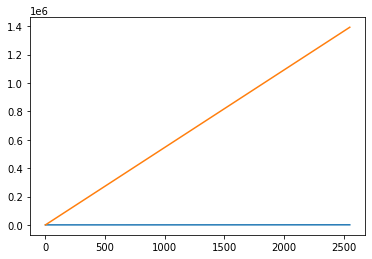

In [128]:
def plot_lin_model(params): 
  plt.plot(tensor_x, tensor_y)
  pred = model(tensor_x, params).detach()
  plt.plot(tensor_x, pred)

plot_lin_model(params)

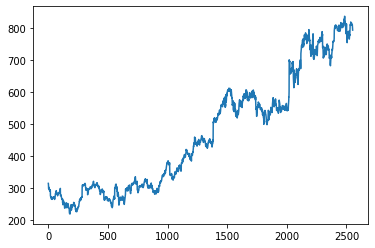

In [130]:
 for _ in range(50): train_one_iteration(params, lr = 2e-7)
 plot_lin_model(params)